## Testing the technical indicators

In [1]:
# importing necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
ohlcv_data = {}

In [5]:
for ticker in tickers:
    temp = yf.download(ticker, period='1mo', interval='15m')
    temp = temp[['Open', 'High', 'Low', 'Close', 'Volume']]
    temp.dropna(inplace=True)
    ohlcv_data[ticker] = temp
ohlcv_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'AAPL': Price                            Open        High         Low       Close  \
 Ticker                           AAPL        AAPL        AAPL        AAPL   
 Datetime                                                                    
 2025-04-16 13:30:00+00:00  198.360001  200.699997  198.300003  198.929993   
 2025-04-16 13:45:00+00:00  198.945007  199.059998  196.300003  196.559998   
 2025-04-16 14:00:00+00:00  196.550003  197.440002  196.020004  196.300003   
 2025-04-16 14:15:00+00:00  196.320007  197.380005  196.210007  197.070007   
 2025-04-16 14:30:00+00:00  197.059998  198.440002  196.809998  198.169998   
 ...                               ...         ...         ...         ...   
 2025-05-15 18:45:00+00:00  211.059998  211.089996  210.490494  210.654999   
 2025-05-15 19:00:00+00:00  210.660004  211.089996  210.589996  210.729996   
 2025-05-15 19:15:00+00:00  210.729996  211.050003  210.324997  210.360001   
 2025-05-15 19:30:00+00:00  210.350006  210.710007  210.

In [6]:
def MACD(data, short_window=12, long_window=26, signal_window=9):
    """
    Calculate MACD and Signal Line
    """
    # Calculate the short-term and long-term EMAs
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()

    # Calculate MACD
    macd = short_ema - long_ema

    # Calculate Signal Line
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()

    return macd, signal_line

In [7]:
for ticker in tickers:
    ohlcv_data[ticker]['MACD'], ohlcv_data[ticker]['Signal Line'] = MACD(ohlcv_data[ticker])
# Display the first few rows of the MACD data for each ticker
for ticker in tickers:
    print(f"MACD data for {ticker}:")
    print(ohlcv_data[ticker][['MACD', 'Signal Line']].head())


MACD data for AAPL:
Price                          MACD Signal Line
Ticker                                         
Datetime                                       
2025-04-16 13:30:00+00:00  0.000000    0.000000
2025-04-16 13:45:00+00:00 -0.189059   -0.037812
2025-04-16 14:00:00+00:00 -0.355769   -0.101403
2025-04-16 14:15:00+00:00 -0.420902   -0.165303
2025-04-16 14:30:00+00:00 -0.379388   -0.208120
MACD data for MSFT:
Price                          MACD Signal Line
Ticker                                         
Datetime                                       
2025-04-16 13:30:00+00:00  0.000000    0.000000
2025-04-16 13:45:00+00:00 -0.157950   -0.031590
2025-04-16 14:00:00+00:00 -0.197734   -0.064819
2025-04-16 14:15:00+00:00 -0.111380   -0.074131
2025-04-16 14:30:00+00:00 -0.016529   -0.062611
MACD data for GOOGL:
Price                          MACD Signal Line
Ticker                                         
Datetime                                       
2025-04-16 13:30:00+00:00  

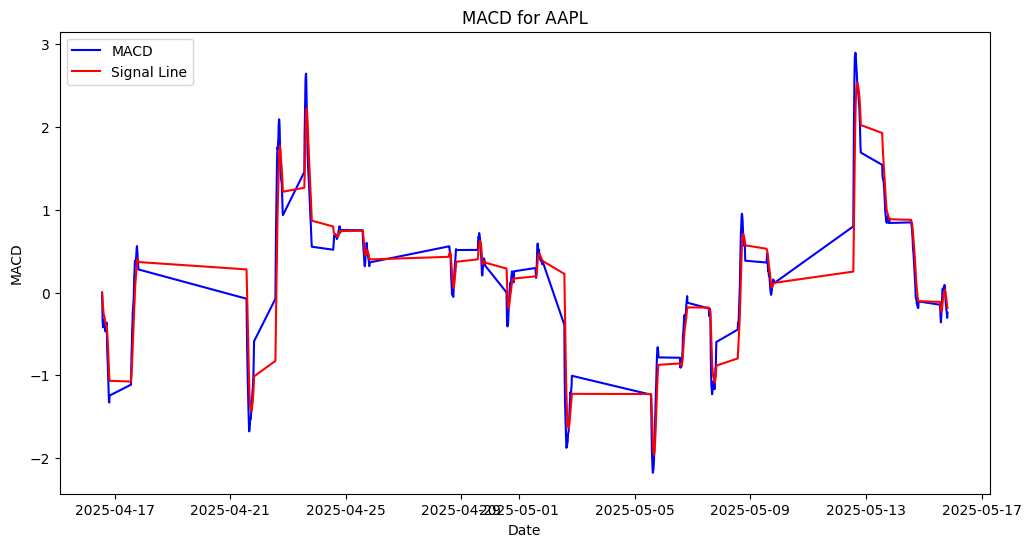

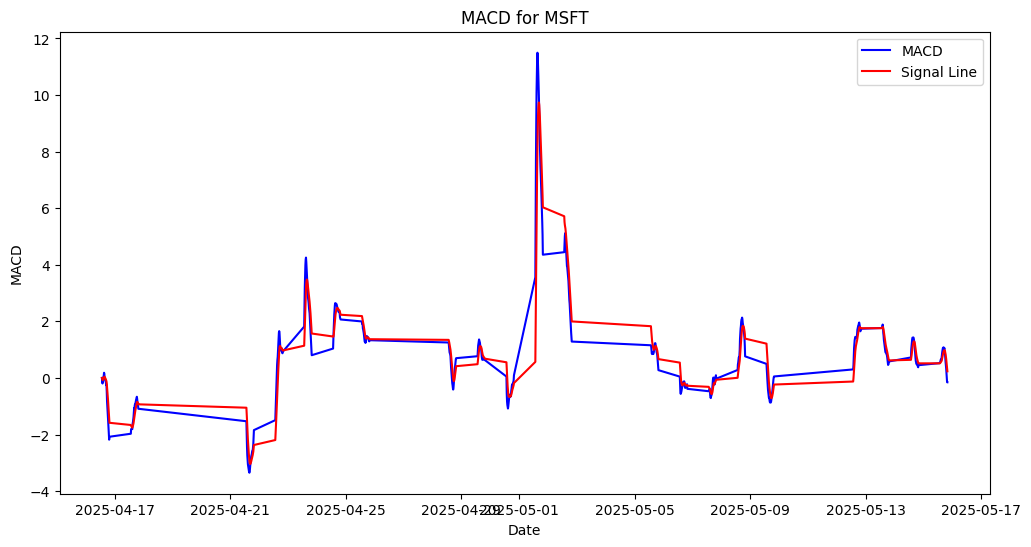

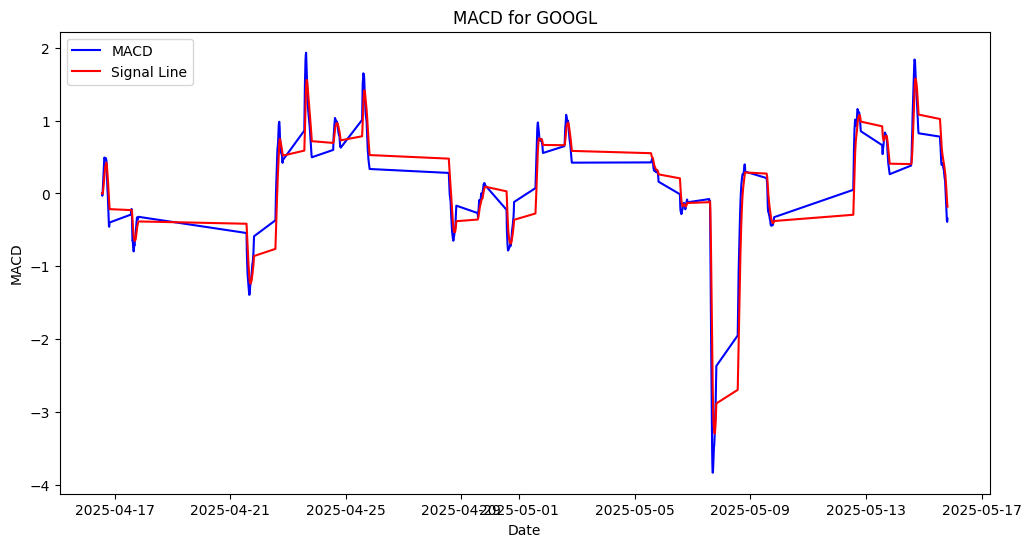

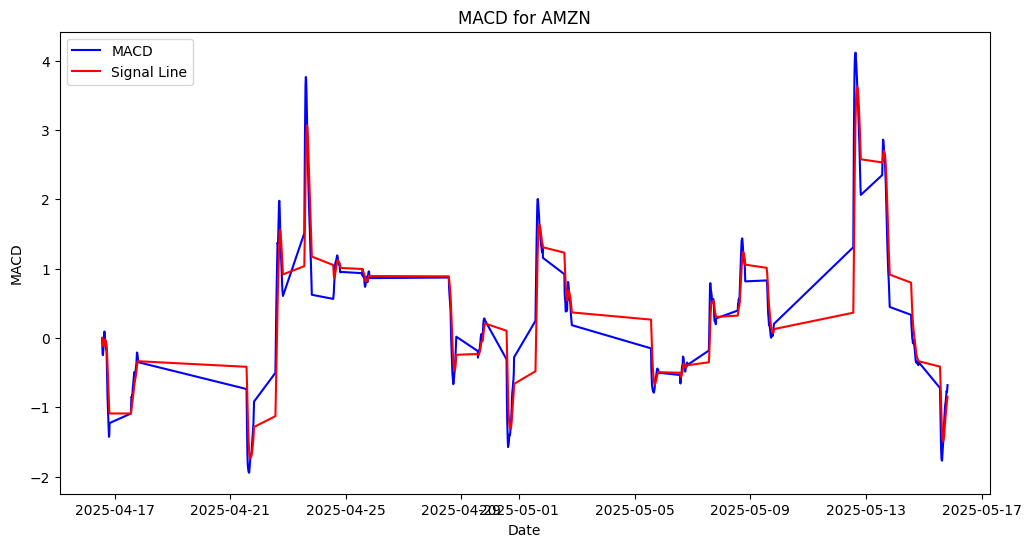

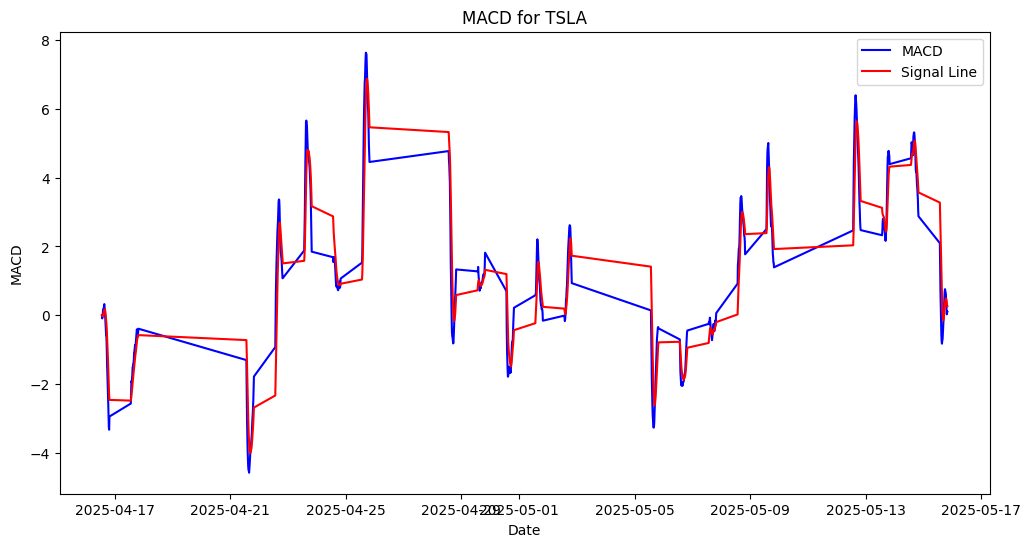

In [ ]:
# Plotting MACD and Signal Line for each ticker 
def plot_macd(data, ticker):
    """
    Plot MACD and Signal Line
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(data['MACD'], label='MACD', color='blue')
    ax.plot(data['Signal Line'], label='Signal Line', color='red')
    ax.set(title=f"MACD for {ticker}", xlabel="Date", ylabel="MACD")
    ax.legend()
    plt.show()

for ticker in tickers:
    plot_macd(ohlcv_data[ticker], ticker)